## Activity 6: Working with adult income dataset (UCI)¶
In this acitvity, you will work with Adult Income Dataset from UCI Machine Learning portal. The Adult Income data set has been used in many machine learning papers that address classification problems. You will read the data from a CSV file into a Pandas DataFrame and do practice some of the advanced data wrangling you learned in this Lesson.

URL for downloading the data
We have the data downloaded as a CSV file on the disk for your ease. However, it is recommended to practice data download on your own so that you are familiar with the process.

Here is the URL for the data set: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

Here is the URL for the description of the data set and the variables (at the end of the document): https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

## Load necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Read the adult income dataset from the following URL: https://github.com/TrainingByPackt/Data-Wrangling-with-Python/blob/master/Chapter04/Activity06/

In [2]:
Adult_Income = pd.read_csv('/Users/Robyn/Documents/Bellevue-University-Classes/DSC540-Data-Preparation/adult_income_data.csv')
Adult_Income

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K


## Create a script that will read a text file line by line.

In [19]:
# I will create a reading script that will extract the headers
# of each column
Headers = []
with open('adult_income_names.txt','r') as front:
    for line in front:
        front.readline()
        var=line.split(":")[0]
        Headers.append(var)
Headers

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

## Add a name of income for the response variable to the dataset

In [20]:
# Next I will use append to to add income to the last row of our data frame
Headers.append('Income')

In [26]:
Adult_Income = pd.read_csv('/Users/Robyn/Documents/Bellevue-University-Classes/DSC540-Data-Preparation/adult_income_data.csv',names=Headers)
Adult_Income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


## Find the missing value

In [28]:
# I will use the null to find any missing value

Adult_Income.isnull().sum()

# As seen below we are not missing any values

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

## Create a dataframe with only age, education, and occupation by using subsetting

In [29]:
New_Adult_Income = Adult_Income[['age','education','occupation']]
New_Adult_Income.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


## Plot a histogram of age with a bin size of 20

<AxesSubplot:>

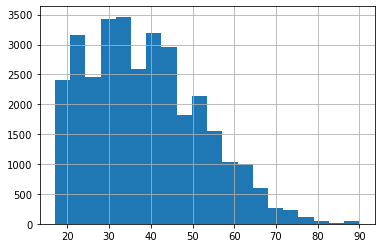

In [30]:
#Next I will use hist to create a histogram for age with a 
# bin size of 20
New_Adult_Income['age'].hist(bins=20)

# Create a function to strip the whitespace characters

In [34]:
# first I will define a function to strip the white spaces
def strip_spaces(s):
    return s.strip()

## Use the **apply** method to apply this function to all the columns with string values, create a new column, copy the values from this new column to the old column, and drop the new column.

In [36]:
# Education
New_Adult_Income['ed_strip']=Adult_Income['education'].apply(strip_spaces)
New_Adult_Income['education']=New_Adult_Income['ed_strip']
New_Adult_Income.drop(labels=['ed_strip'],axis=1,inplace=True)

#Occupation
New_Adult_Income['oc_strip']=Adult_Income['occupation'].apply(strip_spaces)
New_Adult_Income['occupation']=New_Adult_Income['oc_strip']
New_Adult_Income.drop(labels=['oc_strip'],axis=1,inplace=True)

<ipython-input-36-778d03ec76a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_Adult_Income['ed_strip']=Adult_Income['education'].apply(strip_spaces)
<ipython-input-36-778d03ec76a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_Adult_Income['education']=New_Adult_Income['ed_strip']
<ipython-input-36-778d03ec76a0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

## Find the number of people who are aged between 30 and 50

In [42]:
# I will use the New_Adult_Income and set the age > 30 and age < 50
Age30_50 = New_Adult_Income[(New_Adult_Income['age']>=30) & (New_Adult_Income['age']<=50)]
Age30_50.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
5,37,Masters,Exec-managerial
6,49,9th,Other-service


In [43]:
# Next I will use shape to see the amount of people that are aged between 30 to 50
the_Amount = Age30_50.shape[0]
the_Amount
# As seen the amount of people in this age group is 16,390

16390

## Group the records based on age and education to find how the mean age is distributed

In [45]:
# I used group by to see the age of each education level
New_Adult_Income.groupby(['education']).mean()
# As seen below the highest age groups came from 7th and 8th 
# and Docorates

,age
education,
10th,37.429796
11th,32.355745
12th,32.000000
1st-4th,46.142857
5th-6th,42.885886
7th-8th,48.445820
9th,41.060311
Assoc-acdm,37.381443
Assoc-voc,38.553546


## Group by occupation and show the summary statistics of age. Find Which profession has oldest workers on the average and Which profession has its largest share of workforce above 75th percentile.

## Which profession has oldest workers on the average and Use subset and groupby find outliers

In [47]:
# I will use the groupby function to find the profession with 
# the oldest workers 
New_Adult_Income.groupby('occupation').describe()['age']
# As seen below the oldest mean age came from Exec-managerial
# at 42.17

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


## Which profession has its largest share of workforce above 75th percentile. Then plot the values on a bar chart.

In [48]:
Largest_share = New_Adult_Income.groupby('occupation').describe()['age']

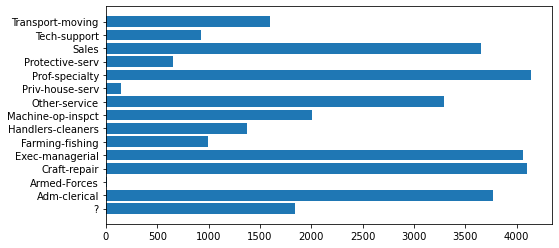

In [55]:
plt.figure(figsize=(8,4))
plt.barh(y=Largest_share.index,width=Largest_share['count'])
plt.show()

## Merge data using the common keys

In [65]:
# I will create mulptiple dataframes and merge them together
# Sample one
Sample_one = Adult_Income[['age','relationship','sex']].sample(10,random_state=101)
Sample_one.head()
# Sample two
Sample_two = Adult_Income[['fnlwgt','workclass','sex']].sample(10,random_state=101)
Sample_two.head()
#merge
df_merged = pd.merge(Sample_one,Sample_two, on='sex',how='inner').drop_duplicates()
df_merged.head()

,age,relationship,sex,fnlwgt,workclass
0,51,Wife,Female,219599,Private
1,51,Wife,Female,150031,?
2,51,Wife,Female,351381,Private
3,51,Wife,Female,264300,?
4,58,Not-in-family,Female,219599,Private
